##**Proyecto Final Programación 2. Titanic**

*   Sofía Argüello Cera
*   Valery Plaza Ensuncho
*  Santiago Palacios Soler



##**Proceso de importación del conjunto de datos del Titanic desde Kaggle**

In [ ]:
# Importamos la libreria pandas
import pandas as pd

In [ ]:
# Configuramos el acceso a kaggle, para poder descargar los datos
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargamos el dataset
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 115MB/s]


In [ ]:
# Descomprimimos el archivo ZIP descargado, extrayendo los archivos CSV
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


##**Punto 1**


*   Se cargaron los archivos CSV en un dataframe distinto
*   Con la funcion **.shape** se explora el dataframe y esto nos muestras las dimensiones, es decir cuantas filas y columnas tiene



In [ ]:
print("\nDataFrame TRAIN")
train = pd.read_csv("train.csv")
print("Test shape:", train.shape)
train.head()


DataFrame TRAIN
Test shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("\nDataFrame TEST")
test = pd.read_csv("test.csv")
print("Test shape:", test.shape)
test.head()


DataFrame TEST
Test shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##**Punto 2**
*Descripción de las variables del DataFrame TRAIN*


| Variable    | Tipo de dato                 | Descripción |
|--------------|-----------------------------|--------------|
| PassengerId  | Entero                      | Identificador único asignado a cada pasajero en el dataset. |
| Survived     | Binaria (0 = No, 1 = Sí)    | Indica si el pasajero sobrevivió al naufragio del Titanic. Es la variable objetivo (*target*). |
| Pclass       | Categórica (1, 2, 3)        | Clase del boleto del pasajero. Representa el nivel socioeconómico: 1 = alta, 2 = media, 3 = baja. |
| Name         | Texto                       | Nombre completo del pasajero, incluye título social (Mr., Mrs., Miss., etc.). |
| Sex          | Categórica (male/female)    | Género del pasajero. |
| Age          | Numérica (decimal)          | Edad del pasajero en años. Algunos valores están ausentes. |
| SibSp        | Entera                      | Número de hermanos o esposas(os) que viajaban junto al pasajero. |
| Parch        | Entera                      | Número de padres o hijos que acompañaban al pasajero. |
| Ticket       | Texto                       | Número o código del boleto adquirido. |
| Fare         | Numérica (decimal)          | Precio del boleto pagado por el pasajero. |
| Cabin        | Texto                       | Código de la cabina asignada. Muchos pasajeros no tienen esta información registrada. |
| Embarked     | Categórica (C, Q, S)        | Puerto donde el pasajero abordó el barco: C = Cherbourg, Q = Queenstown, S = Southampton. |
| Familiares   | Entera                      | Variable creada sumando **SibSp + Parch**. Representa el total de familiares que viajaban con el pasajero. |



*Descripción de las variables del DataFrame TEST*

| **Variable** | **Tipo de dato** | **Descripción** |
|---------------|------------------|-----------------|
| PassengerId | Entera | Identificador único de cada pasajero en el conjunto de prueba. |
| Pclass | Categórica (1, 2, 3) | Clase del boleto del pasajero. Indica el nivel socioeconómico. |
| Name | Texto | Nombre completo del pasajero, con su título social. |
| Sex | Categórica (male/female) | Género del pasajero. |
| Age | Numérica | Edad en años. Puede contener valores faltantes. |
| SibSp | Entera | Número de hermanos o esposas(os) a bordo. |
| Parch | Entera | Número de padres o hijos a bordo. |
| Ticket | Texto | Número o código del boleto. |
| Fare | Numérica | Tarifa pagada por el pasajero. |
| Cabin | Texto | Cabina asignada (dato incompleto en la mayoría de registros). |
| Embarked | Categórica (C, Q, S) | Puerto de embarque. |
| Familiares | Entera | Variable calculada como **SibSp + Parch**, muestra el número total de familiares en el barco. |




##**Punto 3**
La comparación de DataFrames muestra que:

*  Ambos dataframes comparten variables como Pclass, Sex, Age, SibSp, Parch, Fare y Embarked

*   Solo el conjunto train tiene Survived que corresponde a la variable objetivo, indicando si el pasajero sobrevivió o no

*   En las estadísticas numéricas, se puede observar que las variables tienen rangos similares en ambos conjuntos





In [ ]:
print("Estadísticas del DataFrame TRAIN")
print(train.describe(include='all'))
print("\nInformación general de TRAIN:")
print(train.info())

Estadísticas del DataFrame TRAIN
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked 

In [ ]:
print("\nEstadísticas del DataFrame TEST")
print(test.describe(include='all'))
print("\nInformación general de TEST:")
print(test.info())


Estadísticas del DataFrame TEST
        PassengerId      Pclass                      Name   Sex         Age  \
count    418.000000  418.000000                       418   418  332.000000   
unique          NaN         NaN                       418     2         NaN   
top             NaN         NaN  Peter, Master. Michael J  male         NaN   
freq            NaN         NaN                         1   266         NaN   
mean    1100.500000    2.265550                       NaN   NaN   30.272590   
std      120.810458    0.841838                       NaN   NaN   14.181209   
min      892.000000    1.000000                       NaN   NaN    0.170000   
25%      996.250000    1.000000                       NaN   NaN   21.000000   
50%     1100.500000    3.000000                       NaN   NaN   27.000000   
75%     1204.750000    3.000000                       NaN   NaN   39.000000   
max     1309.000000    3.000000                       NaN   NaN   76.000000   

             SibSp

In [ ]:
# Columnas comunes y diferentes
print("\nColumnas comunes:", list(set(train.columns) & set(test.columns)))
print("Columnas solo en train:", list(set(train.columns) - set(test.columns)))
print("Columnas solo en test:", list(set(test.columns) - set(train.columns)))


Columnas comunes: ['Sex', 'Fare', 'Ticket', 'Cabin', 'PassengerId', 'Pclass', 'Parch', 'Age', 'Name', 'SibSp', 'Embarked']
Columnas solo en train: ['Survived']
Columnas solo en test: []


In [ ]:
# Valores nulos
print("\nValores nulos en train:")
print(train.isnull().sum())
print("\nValores nulos en test:")
print(test.isnull().sum())


Valores nulos en train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores nulos en test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##**Punto 4**
Consideramos que la variable “Familiares” es muy útil, ya que representa el tamaño de la familia que acompañaba a cada pasajero en el barco. En el caso del Titanic, creemos que el tamaño de la familia pudo influir en la probabilidad de sobrevivir. Por ejemplo:


*   Familias pequeñas (1–3 miembros): podían ayudarse mutuamente para sobrevivir
*  Personas solas (0 familiares): posiblemente no contaban con apoyo durante la evacuación
*  Familias muy grandes (4 o más integrantes): podían tener más dificultades para permanecer juntas y evacuar con rapidez.





In [ ]:
# Nueva variable 'Familiares' en train
train["Familiares"] = train["SibSp"] + train["Parch"]

print("Primeros valores de la nueva variable 'Familiares':")
display(train[["SibSp", "Parch", "Familiares"]].head())


Primeros valores de la nueva variable 'Familiares':


,SibSp,Parch,Familiares
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [ ]:
# Nueva variable 'Familiares' en test
test["Familiares"] = test["SibSp"] + test["Parch"]

print("Primeros valores de la nueva variable 'Familiares':")
display(test[["SibSp", "Parch", "Familiares"]].head())

Primeros valores de la nueva variable 'Familiares':


,SibSp,Parch,Familiares
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,1,1,2


##**Punto 5**

In [ ]:
# Aqui agregamos una columna llamada 'Origen' para indicar en el dataframe nuevo de donde proviene cada fila
train["Origen"] = "train"
test["Origen"] = "test"

# Aqui agregamos la columna 'Survived' rellena de valores nulos para evitar errores y mantener la misma estructura de las columnas
test["Survived"] = None

print("\nDataFrames con la nueva columna 'origen':")
print("\nTrain:")
display(train.head(2))
print("\nTest:")
display(test.head(2))


DataFrames con la nueva columna 'origen':

Train:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares,origen,Origen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,train,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,train,train



Test:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares,origen,Survived,Origen
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,test,None,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,test,None,test


In [ ]:
# Unimos los DataFrames verticalmente con la función concat y usamos la función ignore_index para reasignar los índices y no hayan índices duplicados
data_total = pd.concat([train, test], axis=0, ignore_index=True)

print("\nDataFrame combinado (train + test) con columna 'origen':")
print("\nPrimeras 5 filas:")
display(data_total.head())
print("\nUltimas 5 filas:")
display(data_total.tail())


DataFrame combinado (train + test) con columna 'origen':

Primeras 5 filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares,origen,Origen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,train,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,train,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,train,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,train,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,train,train



Ultimas 5 filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares,origen,Origen
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,test,test
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,test,test
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,test,test
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,test,test
1308,1309,None,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,2,test,test


##**Punto 6**
Discusión grupal:
*  Como grupo concluimos que las variables numéricas de ambos conjuntos (train y test) presentan medias, desviaciones y rangos muy similares. Esto significa que los dos provienen de la misma población y no hay diferencias significativas entre ellos. En general, consideramos que el conjunto de prueba es representativo y adecuado para evaluar correctamente el modelo entrenado.

In [ ]:
# Estadísticas del nuevo DataFrame
print("\nEstadísticas DataFrame completo (data_total):")
display(data_total.describe(include='all'))


Estadísticas DataFrame completo (data_total):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares,origen,Origen
count,1309.000000,891.0,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000,1309,1309
unique,NaN,2.0,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN,2,2
top,NaN,0.0,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN,train,train
freq,NaN,549.0,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN,891,891
mean,655.000000,NaN,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,0.883881,NaN,NaN
std,378.020061,NaN,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,1.583639,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,328.000000,NaN,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000,NaN,NaN
50%,655.000000,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,NaN,NaN
75%,982.000000,NaN,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000,NaN,NaN


##**Punto 7**
Como grupo concluimos que los datos faltantes tienen distintos significados según la variable. En Age y Fare, representan información que no fue registrada en su momento. En Cabin, los valores nulos indican que muchos pasajeros no tenían cabina asignada, especialmente los de tercera clase. En Embarked, los faltantes se deben a pequeños errores de registro histórico. Finalmente, en Survived, la ausencia de datos en el conjunto de prueba es intencional, ya que es la variable que el modelo debe predecir

##**Punto 8**
*Respondimos a cada pregunta con los resultados que arroja el siguiente codigo*

In [ ]:
# (a) Edad promedio de todos los pasajeros (train + test)
edad_promedio = data_total["Age"].mean()
print(f"(a) Edad promedio de los pasajeros: {edad_promedio:.2f} años")

# (b) Pasajeros que sobrevivieron y murieron (sin usar skipna)
sobrevivieron_total = data_total["Survived"].sum()
murieron_total = data_total["Survived"].count() - sobrevivieron_total
print(f"(b) Sobrevivieron: {int(sobrevivieron_total)} | Murieron: {int(murieron_total)}")

# (c) Tarifa promedio pagada por los pasajeros de primera clase
tarifa_promedio = data_total[data_total["Pclass"] == 1]["Fare"].mean()
print(f"(c) Tarifa promedio de primera clase: {tarifa_promedio:.2f}")

# (d) Pasajeros que viajaron con al menos un familiar a bordo
con_familia = data_total[data_total["Familiares"] > 0].shape[0]
print(f"(d) Pasajeros con familiares a bordo: {con_familia}")

# (e) Edad más joven y más vieja
edad_min = data_total["Age"].min()
edad_max = data_total["Age"].max()
print(f"(e) Edad más joven: {edad_min} años | Edad más vieja: {edad_max} años")

# (f) Pasajeros por puerto de embarque
print("(f) Pasajeros por puerto de embarque:")
display(data_total["Embarked"].value_counts())

# (g) Pasajeros solos y con familiares
solos = data_total[data_total["Familiares"] == 0].shape[0]
con_familia = data_total[data_total["Familiares"] > 0].shape[0]
print(f"(g) Viajaron solos: {solos} | Viajaron con familiares: {con_familia}")

(a) Edad promedio de los pasajeros: 29.88 años
(b) Sobrevivieron: 342 | Murieron: 549
(c) Tarifa promedio de primera clase: 87.51
(d) Pasajeros con familiares a bordo: 519
(e) Edad más joven: 0.17 años | Edad más vieja: 80.0 años
(f) Pasajeros por puerto de embarque:


,count
Embarked,
S,914
C,270
Q,123


(g) Viajaron solos: 790 | Viajaron con familiares: 519


##**Punto 9**
**(a)** Sí, como grupo observamos que sobrevivieron más mujeres que hombres, y proporcionalmente las mujeres también tuvieron una tasa de supervivencia mucho mayor

**(b)** Concluimos que sobrevivieron más niños que hombres adultos, y proporcionalmente los niños también tuvieron una mayor probabilidad de sobrevivir

**(c)** Notamos que los pasajeros menores de 10 años sobrevivieron más que los de otros grupos etarios, mientras que los mayores de 50 tuvieron una tasa de supervivencia más baja

**(d)** Vimos que la mayor cantidad de sobrevivientes partió de Southampton, aunque proporcionalmente los pasajeros de los otros puertos (Cherbourg y Queenstown) presentaron tasas de supervivencia más altas

**(e)** Finalmente, observamos que los pasajeros de primera clase sobrevivieron más, y proporcionalmente también tuvieron la mayor tasa de supervivencia frente a las demás clases

In [ ]:
# (a) Mujeres vs hombres
print("(a) Supervivencia por sexo:")
tabla_sexo = data_total.groupby("Sex")["Survived"].agg(['sum','count','mean'])
display(tabla_sexo)

# (b) Niños (<18 años) vs hombres adultos (>=18 y sexo masculino)
print("(b) Supervivencia de niños vs hombres adultos:")
niños = data_total[(data_total["Age"] < 18)]
hombres_adultos = data_total[(data_total["Age"] >= 18) & (data_total["Sex"] == "male")]

print(f"Niños que sobrevivieron: {niños['Survived'].sum()} de {niños['Survived'].count()}  - Promedio: {niños['Survived'].mean():.2f}")
print(f"Hombres adultos que sobrevivieron: {hombres_adultos['Survived'].sum()} de {hombres_adultos['Survived'].count()}  - Promedio: {hombres_adultos['Survived'].mean():.2f}")

# (c) Pasajeros con edad >50 o <10 años
print("\n(c) Supervivencia en mayores de 50 y menores de 10 años:")
grupo_mayores = data_total[data_total["Age"] > 50]
grupo_menores = data_total[data_total["Age"] < 10]
grupo_intermedio = data_total[(data_total["Age"] >= 10) & (data_total["Age"] <= 50)]

print(f"Mayores de 50: {grupo_mayores['Survived'].mean():.2f}")
print(f"Menores de 10: {grupo_menores['Survived'].mean():.2f}")
print(f"Entre 10 y 50: {grupo_intermedio['Survived'].mean():.2f}")

# (d) Puerto de embarque
print("\n(d) Supervivencia por puerto de embarque:")
tabla_emb = data_total.groupby("Embarked")["Survived"].agg(['sum','count','mean'])
display(tabla_emb)

# (e) Clase del boleto
print("\n(e) Supervivencia por clase (Pclass):")
tabla_clase = data_total.groupby("Pclass")["Survived"].agg(['sum','count','mean'])
display(tabla_clase)

(a) Supervivencia por sexo:


,sum,count,mean
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


(b) Supervivencia de niños vs hombres adultos:
Niños que sobrevivieron: 61 de 113  - Promedio: 0.54
Hombres adultos que sobrevivieron: 70 de 395  - Promedio: 0.18

(c) Supervivencia en mayores de 50 y menores de 10 años:
Mayores de 50: 0.34
Menores de 10: 0.61
Entre 10 y 50: 0.39

(d) Supervivencia por puerto de embarque:


,sum,count,mean
Embarked,,,
C,93,168,0.553571
Q,30,77,0.38961
S,217,644,0.336957



(e) Supervivencia por clase (Pclass):


,sum,count,mean
Pclass,,,
1,136,216,0.62963
2,87,184,0.472826
3,119,491,0.242363


##**Punto 10**


In [ ]:
# Clasificamos de los pasajeros en grupos familiares
def clasificar_familia(x):
    if x == 0:
        return "Grupo 1: Sin familiares"
    elif 1 <= x <= 3:
        return "Grupo 2: Familias pequeñas"
    else:
        return "Grupo 3: Familias grandes"

# Creamos la nueva columna 'Grupo_familiar'
data_total["Grupo_familiar"] = data_total["Familiares"].apply(clasificar_familia)

print("Clasificación de pasajeros por tamaño de familia:")
display(data_total[["Familiares", "Grupo_familiar"]].head(10))

# Distribución de cabinas (solo las que sí están registradas)
print("\nDistribución de cabinas registradas por grupo familiar:")
tabla_cabinas = data_total.groupby("Grupo_familiar")["Cabin"].value_counts()
display(tabla_cabinas)

Clasificación de pasajeros por tamaño de familia:


,Familiares,Grupo_familiar
0,1,Grupo 2: Familias pequeñas
1,1,Grupo 2: Familias pequeñas
2,0,Grupo 1: Sin familiares
3,1,Grupo 2: Familias pequeñas
4,0,Grupo 1: Sin familiares
5,0,Grupo 1: Sin familiares
6,0,Grupo 1: Sin familiares
7,4,Grupo 3: Familias grandes
8,2,Grupo 2: Familias pequeñas
9,1,Grupo 2: Familias pequeñas



Distribución de cabinas registradas por grupo familiar:


Grupo_familiar              Cabin          
Grupo 1: Sin familiares     D                  4
                            F33                4
                            E101               3
                            B28                2
                            B35                2
                                              ..
Grupo 2: Familias pequeñas  E52                1
                            E68                1
                            F E69              1
Grupo 3: Familias grandes   C23 C25 C27        6
                            B57 B59 B63 B66    5
Name: count, Length: 192, dtype: int64

##**Punto 11**
Como grupo concluimos que el sexo y la posesión de cabina influyeron fuertemente en la supervivencia. Las mujeres y los niños, especialmente quienes tenían cabina, presentaron las tasas más altas de supervivencia, mientras que los hombres adultos sin cabina fueron el grupo más afectado. En general, la cabina y el sexo se destacan como factores determinantes en las probabilidades de sobrevivir.

In [ ]:
# Creamos la nueva variable 'Grupo_etario'
def clasificar_edad(edad):
    if pd.isnull(edad):
        return None
    elif edad < 10:
        return "Niño"
    elif 18 <= edad <= 49:
        return "Adulto"
    elif edad >= 50:
        return "Mayor"
    else:
        return "Otro"  # Aqui son edades entre 10 y 17 años

data_total["Grupo_etario"] = data_total["Age"].apply(clasificar_edad)

# Creamos columna booleana para identificar si tiene cabina
data_total["Tiene_cabina"] = data_total["Cabin"].notnull()

# Agrupamos por grupo etario, sexo y cabina, calculando supervivencia
tabla_proporciones = data_total.groupby(["Grupo_etario", "Sex", "Tiene_cabina"])["Survived"].agg(["sum", "count", "mean"])

print("Proporción de supervivencia por grupo etario, sexo y cabina:")
display(tabla_proporciones)


Proporción de supervivencia por grupo etario, sexo y cabina:


sum  count      mean
Grupo_etario Sex    Tiene_cabina                     
Adulto       female False         77    120  0.641667
                    True          62     64   0.96875
             male   False         35    278  0.125899
                    True          28     65  0.430769
Mayor        female False          7      7       1.0
                    True          13     15  0.866667
             male   False          2     30  0.066667
                    True           5     22  0.227273
Niño         female False         17     26  0.653846
                    True           2      4       0.5
             male   False         13     26       0.5
                    True           6      6       1.0
Otro         female False         12     18  0.666667
                    True           7      7       1.0
             male   False          2     24  0.083333
                    True           2      2       1.0

##**Punto 12. Gráficas**

In [ ]:
# Importamos la librería matplotlib para crear y mostrar las gráficas
import matplotlib.pyplot as plt

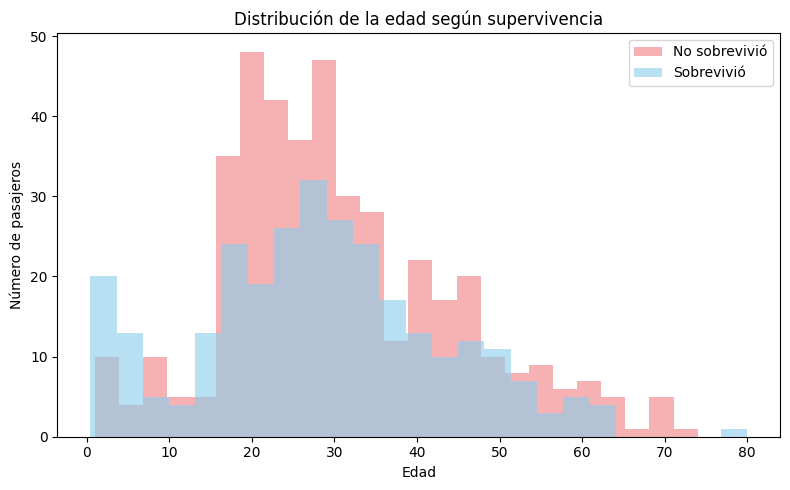

In [ ]:
# Creamos un histograma para comparar la distribución de edades entre pasajeros que sobrevivieron y los que no
plt.figure(figsize=(8,5))
mask = data_total["Survived"].isin([0,1])
plt.hist(data_total.loc[mask & (data_total["Survived"]==0), "Age"].dropna(),
         bins=25, alpha=0.6, label="No sobrevivió", color="lightcoral")
plt.hist(data_total.loc[mask & (data_total["Survived"]==1), "Age"].dropna(),
         bins=25, alpha=0.6, label="Sobrevivió", color="skyblue")
plt.title("Distribución de la edad según supervivencia")
plt.xlabel("Edad")
plt.ylabel("Número de pasajeros")
plt.legend()
plt.tight_layout()
plt.show()


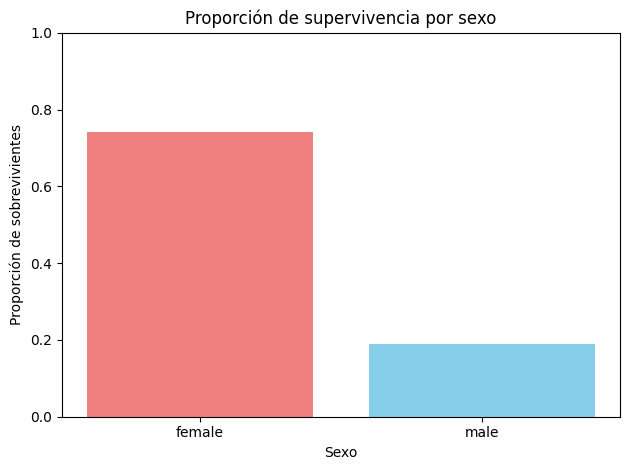

In [ ]:
# Creamos un gráfico de barras para comparar la proporción de supervivencia entre mujeres y hombres
mask = data_total["Survived"].isin([0,1])
tabla_sexo = data_total.loc[mask].groupby("Sex")["Survived"].mean()
plt.bar(tabla_sexo.index, tabla_sexo.values, color=["lightcoral","skyblue"])
plt.title("Proporción de supervivencia por sexo")
plt.ylabel("Proporción de sobrevivientes")
plt.xlabel("Sexo")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

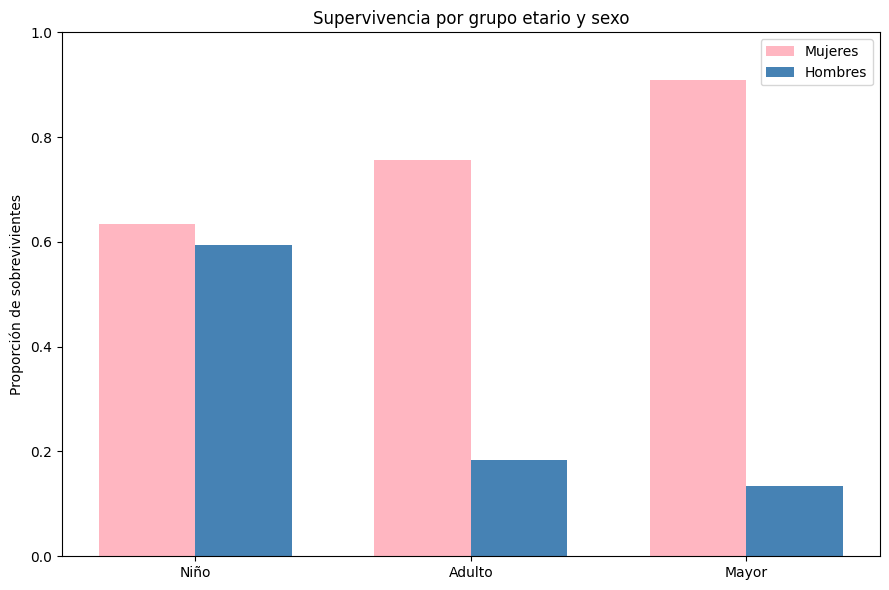

In [ ]:
# Creamos un gráfico de barras que muestra la proporción de supervivencia según el grupo etario y el sexo,
# comparando mujeres y hombres dentro de cada categoría de edad
mask = data_total["Survived"].isin([0,1]) & data_total["Grupo_etario"].notnull()
tabla_ge_sex = data_total.loc[mask].groupby(["Grupo_etario","Sex"])["Survived"].mean()

orden = ["Niño","Adulto","Mayor"]
sexos = ["female","male"]
vals_f = [tabla_ge_sex.get((g,"female"),0) for g in orden]
vals_m = [tabla_ge_sex.get((g,"male"),0) for g in orden]

x = range(len(orden))
w = 0.35
plt.figure(figsize=(9,6))
plt.bar([i-w/2 for i in x], vals_f, width=w, label="Mujeres", color="lightpink")
plt.bar([i+w/2 for i in x], vals_m, width=w, label="Hombres", color="steelblue")
plt.xticks(x, orden)
plt.ylim(0,1)
plt.ylabel("Proporción de sobrevivientes")
plt.title("Supervivencia por grupo etario y sexo")
plt.legend()
plt.tight_layout()
plt.show()

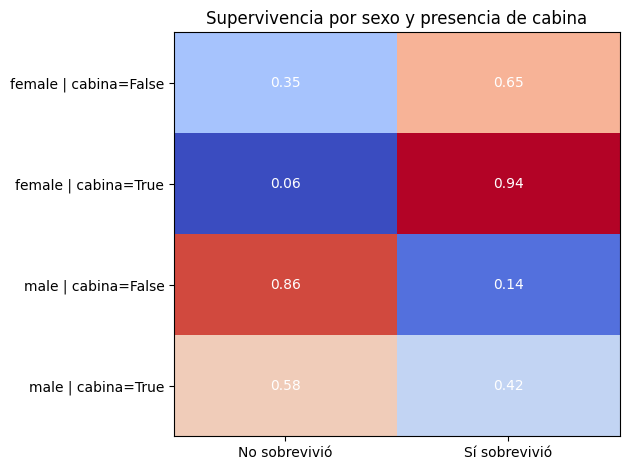

In [ ]:
# Creamos un mapa de calor que muestra cómo cambia la supervivencia según el sexo y si el pasajero tenía o no cabina
mask = data_total["Survived"].isin([0,1])
cr = pd.crosstab([data_total.loc[mask,"Sex"],
                  data_total.loc[mask,"Tiene_cabina"]],
                 data_total.loc[mask,"Survived"],
                 normalize="index")

plt.imshow(cr, cmap="coolwarm", aspect="auto")
plt.xticks([0,1], ["No sobrevivió","Sí sobrevivió"])
plt.yticks(range(cr.shape[0]),
           [f"{idx[0]} | cabina={idx[1]}" for idx in cr.index])
for i in range(cr.shape[0]):
    for j in range(cr.shape[1]):
        plt.text(j, i, f"{cr.values[i,j]:.2f}", ha="center", va="center", color="white")
plt.title("Supervivencia por sexo y presencia de cabina")
plt.tight_layout()
plt.show()

##**Punto 13**
*Creamos la siguiente tabla para responder a la pregunta*

Como grupo concluimos que las mujeres, especialmente las de clases altas y con cabina, fueron quienes tuvieron más probabilidades de sobrevivir. En cambio, los hombres adultos de clases bajas sin cabina fueron los más vulnerables. Esto refleja que factores como el sexo, la clase social y el acceso a cabina influyeron fuertemente en las posibilidades de supervivencia en el Titanic

In [ ]:
# Filtramos solo las filas donde Survived sea 0 o 1 (del train)
mask = data_total["Survived"].isin([0,1])
df = data_total.loc[mask]

# Calculamos la tasa de supervivencia por sexo, clase, cabina y grupo etario
tabla = (df.groupby(["Sex", "Pclass", "Tiene_cabina", "Grupo_etario"])["Survived"].mean().reset_index().sort_values("Survived", ascending=False))

# Mostramos los 20 grupos con mayor supervivencia
display(tabla.head(20))

,Sex,Pclass,Tiene_cabina,Grupo_etario,Survived
0,female,1,False,Adulto,1.0
10,female,2,True,Adulto,1.0
30,male,2,True,Niño,1.0
27,male,2,False,Niño,1.0
24,male,1,True,Otro,1.0
23,male,1,True,Niño,1.0
1,female,1,False,Mayor,1.0
14,female,3,False,Mayor,1.0
12,female,2,True,Niño,1.0
36,male,3,True,Niño,1.0
